In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
img_array = cv2.imread("archive/mrleyedataset/Open-Eyes/s0001_01843_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)

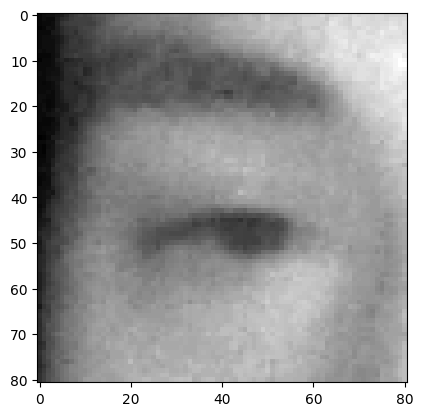

In [4]:
plt.imshow(img_array, cmap='gray')

In [5]:
print(img_array.shape)

(81, 81)


In [6]:
mrl_eye = "archive/mrleyedataset"
classes = ["Close-Eyes", "Open-Eyes"]



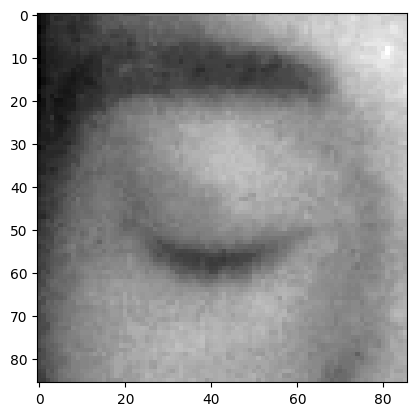

In [7]:
for category in classes:
    path = os.path.join(mrl_eye, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break


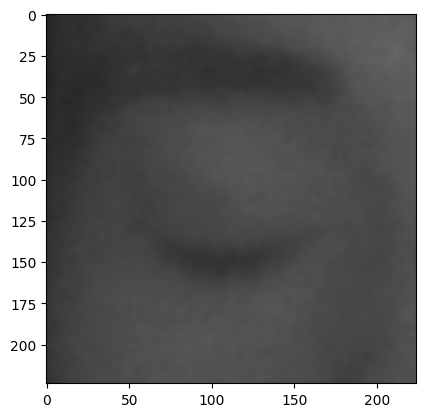

In [8]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [9]:
training_data = []

def create_training_data():
    for category in classes:
        path = os.path.join(mrl_eye, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [10]:
create_training_data()
#save the training data in an external file

In [11]:
print(len(training_data))

84898


In [12]:
import random
random.shuffle(training_data)

In [13]:
x = []
y = []
mini_data = training_data[:3500]
for features, label in mini_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3)

x.shape


(3500, 224, 224, 3)

In [14]:
x = x.astype('float32') / 255.0

In [15]:
y = np.array(y)

In [16]:
# import pickle

# pickle_out = open("x.pickle", "wb")
# pickle.dump(x, pickle_out)
# pickle_out.close()

# pickle_out = open("y.pickle", "wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

In [17]:
# import pickle

# pickle_in = open("x.pickle", "rb")
# x = pickle.load(pickle_in)

# pickle_in = open("y.pickle", "rb")
# y = pickle.load(pickle_in)

In [18]:
print(x.shape)
print(y.shape)
# print(x[1])
i= 0
while y[i] == 0:
    # print(y[i])
    i += 1
# print(i)
# print(y[i])
# print(y[0])
# print(y[1])

(3500, 224, 224, 3)
(3500,)


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model = tf.keras.applications.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [21]:
base_input = model.layers[1].input
base_input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor>

In [22]:
base_output = model.layers[-4].output
base_output

<KerasTensor shape=(None, 1, 1, 1024), dtype=float32, sparse=False, name=keras_tensor_87>

In [23]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)


In [24]:
new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [25]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [26]:
new_model.fit(x, y, epochs = 10, validation_split = 0.2)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 101s 952ms/step - accuracy: 0.8902 - loss: 0.2919 - val_accuracy: 0.9100 - val_loss: 0.2365
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 82s 928ms/step - accuracy: 0.9858 - loss: 0.0391 - val_accuracy: 0.9257 - val_loss: 0.2981
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 81s 917ms/step - accuracy: 0.9923 - loss: 0.0206 - val_accuracy: 0.9243 - val_loss: 0.3148
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 81s 917ms/step - accuracy: 0.9932 - loss: 0.0188 - val_accuracy: 0.9814 - val_loss: 0.0470
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 81s 922ms/step - accuracy: 0.9963 - loss: 0.0127 - val_accuracy: 0.9771 - val_loss: 0.0808
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 81s 924ms/step - accuracy: 0.9911 - loss: 0.0275 - val_accuracy: 0.9857 - val_loss: 0.0695
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 81s 925ms/step - accuracy: 0.9850 - loss: 0.0444 - val_accuracy: 0.9814 - val_loss: 0.1012
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 84s 949ms/step - accuracy: 0.9957 - loss: 0.0120 - val_acc

In [ ]:
# new_model.save('my_model.h5')


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

new_model = tf.keras.models.load_model('my_model.h5')

In [3]:
img_size = 224
# img_array = cv2.imread("archive/mrleyedataset/Close-Eyes/s0037_00905_1_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)
img_array = cv2.imread("archive/mrleyedataset/Open-Eyes/s0001_01843_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)

# img_array = cv2.imread("archive/Screenshot 2024-10-29 212454.png", cv2.IMREAD_GRAYSCALE)
# img_array = cv2.imread("archive/garden.jpg", cv2.IMREAD_GRAYSCALE)
# img_array = cv2.imread("archive/garden.jpg", cv2.IMREAD_GRAYSCALE)

backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))


In [4]:
x_input = np.array(new_array).reshape(1, img_size, img_size, 3)
x_input.shape


(1, 224, 224, 3)

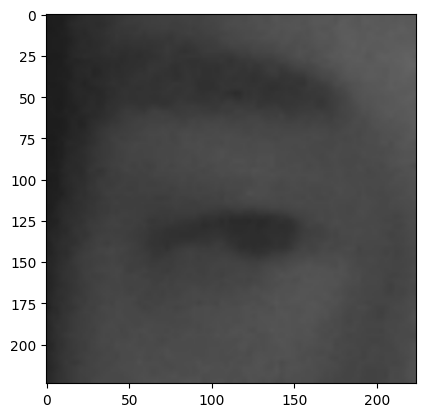

In [5]:
plt.imshow(new_array, cmap='gray')

In [6]:
x_input = x_input/255.0

In [7]:
prediction = new_model.predict(x_input)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step


array([[0.99967927]], dtype=float32)

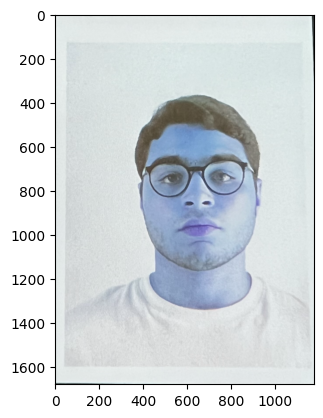

In [8]:
# img = cv2.imread("archive/Screenshot 2025-02-12 002121.png")
img = cv2.imread("archive/mido_open.jpg")
# img = cv2.imread("archive/man_close.png")

# img = cv2.imread("archive/mido_close_1.jpg")

# img = cv2.imread("archive/mido_close.jpg")

plt.imshow(img)

In [9]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [10]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [12]:
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

In [13]:
for (x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    

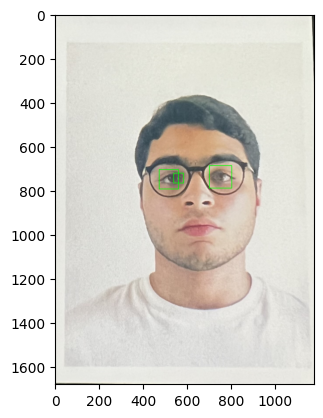

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
#CROP THE EYES
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]


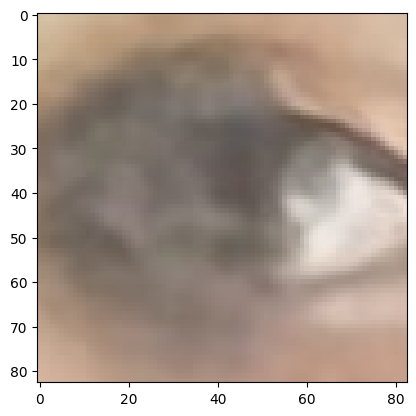

In [16]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [17]:
eyes_roi.shape

(83, 83, 3)

In [18]:
final_image = cv2.resize(eyes_roi, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0
final_image.shape

(1, 224, 224, 3)

In [19]:
new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


array([[0.9851223]], dtype=float32)

In [20]:
# real time detection
import cv2

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]
    final_image = cv2.resize(eyes_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    
    predictions = new_model.predict(final_image)
    if predictions > 0.7:
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for x, y, w, h in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, status, (50, 50), font, 3, (0, 0, 255), 2, cv2.LINE_4)
    cv2.imshow('Drowsiness Detection', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
False
eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Fals